# Predicting the Level of Interest of a Rental Listing

Final Project Paper

By Dane Noland

DS-SEA-06

## 1. Background
The urban hunt for a place to live can be a challenging and dauting experience.  This is especially true when low vacancy rates and fast-moving markets are added to the equation.  In February 2009, a website and mobile-based search engine named RentHop was created help solve the problem of finding an apartment in larger city areas.  The search engine originated in New York City and has since expanded to Boston, Chicago, Dallas, Houston, Los Angeles, Miami, and Washington DC.  The site delivers real-time listings and searches can be refined by bedrooms, monthly rent, amenities, availability of floorplans, as well as specific keywords.  Moreover,the website helps inform and educate renters by featuring price heatmaps, trends, and statistics for each metro area and neighborhood.

Although RentHop has been helpful in easing the search for apartments with respect to renters, it has made rental listings more competitive for landlords.  Having a search engine that allows potential tenants to more easily search and sort through numerous listing means that more competition is being added to the market with respect to landlords.  The increase in rental resources, as well as a competetive market, has the potential to increase the turnaround time between tenants, therefore decreasing the cash flow of a property.  The question is no longer just, "can I rent the unit"?  It has become, "how can I attract the most interest in my property"?  Being able to increase the interest level in a rental listing will decrease the turnaround time for that unit.




## 2. Problem Statement

**Can I predict the interest level of a rental unit based on the listing's features: number of bedrooms/bathrooms, location, or date/time of posting? In this case,the interst level is defined by the number of inquiries a listing during its  that the listing was live on the site (RentHop).**

My initial hypotheses are:

* Specific listing features (key features) can be used to catagorize defined interest levels:
  * Low
  * Medium
  * High
  
  
* Landlords can impliment these key features to increase the interest levels of their rentals.


## 3. Data

### 3.1 Data Import
The dataframe (https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data) comes from a Kaggle competition and was collected from RentHop.com. The dataframe was downloaded as two JSON files: train.JSON and test.JSON.  The dataframe consists of rental listings in New York City over a one year period.  Pandas was used to import, read, and analyze the data.


In [1]:
#Importing all needed functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import re
import itertools as it

%matplotlib inline
### Seaborn style
sns.set_style("whitegrid")

### Importing Train Data to notebook
"""
***DATA FIELDS - Definitions***
-bathrooms: number of bathrooms
-bedrooms: number of bathrooms
-building_id: the ID number set for buildings in the city/area?
-created: The date and time of posting
-description: Input provided by the user to describe the unit
-display_address: Looks like neighborhood 
-features: a list of features about this apartment
-latitude: self explanitory
-listing_id: the ID number given to a posting for reference
-longitude: self explanitory
-manager_id: The id given to the person posting the rental 
-photos: a list of photo links. ***I didn't download this*** 
-price: monthly rent in USD
-street_address: Street address of housing in NYC
-interest_level: this is the target variable. It has 3 categories: 'high', 'medium', 'low'
"""
train_data = pd.read_json('train.json')

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 3.1 Data Investigation
Once the data was imported, the dataframe was investigated to gain a big picture understanding of:

* **Duration**
  * What is the timeline of the dataset?

* **Property features**
  * Relative frequency of bedrooms
  * Relative frequency of bathrooms
  * Listing locations (i.e., neighborhoods)
  * Relative frequency of interest levels
  
Based on the outputs below, the dataframe consists of 49,352 property listings.  Each listing has 15 associated features, one of which is the interest level. Moreover, the dataframe consists of property listings in New York City that were posted between April and June 2016.  The figure below displays the number of occurances for low, medium, and high interest level listings.  Out of the 49,352 listed properties, less than 5,000 of the properties had a high interest level.

Other associated listing features are presented in the heads table below.

The shape of the data is: (49352, 15)


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


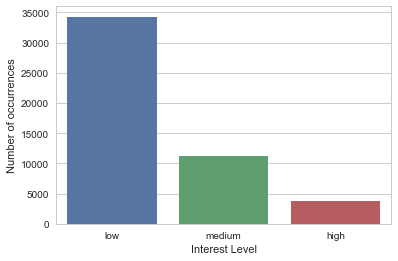

In [2]:
### How any entries are there?  How many associated features does an entry have?  What is the shape?

sns.countplot(train_data.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

print'The shape of the data is:', train_data.shape
train_data.head(5)

In [3]:
"""Cleaning the data and adding numeric values for further analysis"""

# Numerical substitute of Interest Level (low=0, med=1, high=2)
train_data['interest'] = np.where(train_data.interest_level=='low', 0,
                                  np.where(train_data.interest_level=='medium', 1, 2))

# Conversion of date and time to numerical values
train_data.created = pd.to_datetime(train_data.created, format='%Y-%m-%d %H:%M:%S')

# New Month, Day of Week and Hour Features
train_data['month'] = train_data.created.dt.month
train_data['day_of_week'] = train_data.created.dt.weekday_name
train_data['hour'] = train_data.created.dt.hour

# Getting number of photos (Since I will not be using visual analysis of photos)
train_data['photos_number'] = train_data.photos.str.len()


Once an understanding of the data was gained, further features were explored.  The main features explored were: bedrooms, bathrooms, number of photos in the listing, the day the listing was posted, the hour the listing was posted, and the geographic location of listings.  Moreover, a heat map was generated to help determine correlation between the features. Once the features were visualized with respect to interest level (see figures below), the following insight was gathered:

* **Bedrooms**
  * The average number of bedrooms was the same regardless of interest level (approximately 1-2 bedrooms).  
  * **Summary:** The fact that the average number of bedrooms is the same across the board indicates that those two features are not correlated.


* **Bathrooms**
  * The average number of bathrooms was the same regardless of interest level (approximately 1-2 bathrooms).  
  * **Summary:** The fact that the average number of bathrooms is the same across the board indicates that those two features are not correlated.


* **Number of Photos**
  * The relationship of number of photos apears to be normally distrubuted.
  * Not having a photo increased the chances of a low interest level, however, some medium and high intest level listings did not have photos.
  * The majority of high interest level listings had bewteen 4 and 6 photos.  The peak of the curve was 5 pictures.
  * **Summary:** Since interest levels (low, medium, and high) were distributed similarlly with respect to the number of photos, there does not seem to be a strong correlation between these two features and whether or not they could predict a high interest level.


* **Day of Listing**
  * Listings posted between Tuesday and Friday recieved the greatest frenquencies of interest (whether high, medium, or low).
  * Wednesday appears to be the best day to post a listing.
  * **Summary:** Since interest levels (low, medium, and high) were distributed similarlly with respect to the day the listing was posted, there does not seem to be a strong correlation between these two features and whether or not they could predict a high interest level.


* **Time of Listing**
  * Listings posted between 2am and 6am recieved the most interest, whether high or low.
  * **Summary:** Since interest levels (low, medium, and high) were distributed similarlly with respect to the hour the listing was posted, there does not seem to be a strong correlation between these two features and whether or not they could predict a high interest level.


* **Geographic Location of Listing**
  * Listings with high interest levels are mostly clustered in Manhattan with a few outliers in other burroughs.
  * **Summary:** This is a strong correlation between the geographic location of a listing and the interest level of the listing.


* **Correlation Heat Map**
  * The four features that appear to have the stongest correlation to interest level are (listed from greatest to lowest): hour the listing was posted, number of photos in listing, and the listing price.
  * There is not a strong correlation between latitude/longitude and interest level when they are separate, however, geographic location is important based on the geographic location figure.
  * **Summary:** Latitude and longitude are very important to the interest level, however, they are not important on their own. If we can define geographic location based on their latitude/longitude, and apply other criteria (such as hour of posting, number of photos, and price).

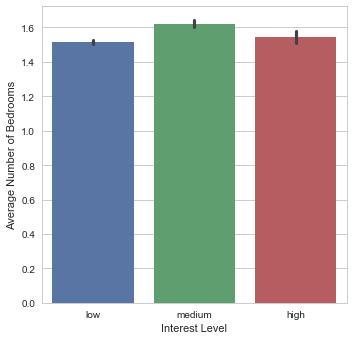

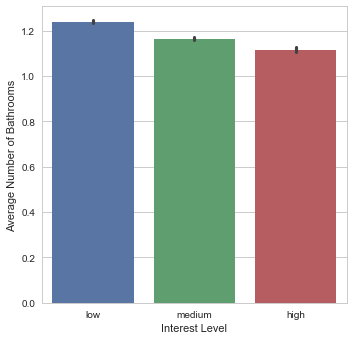

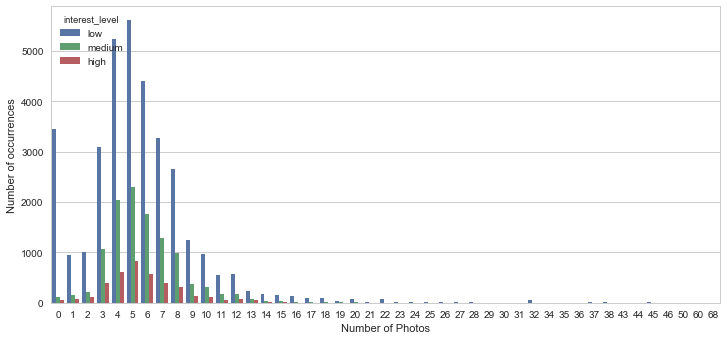

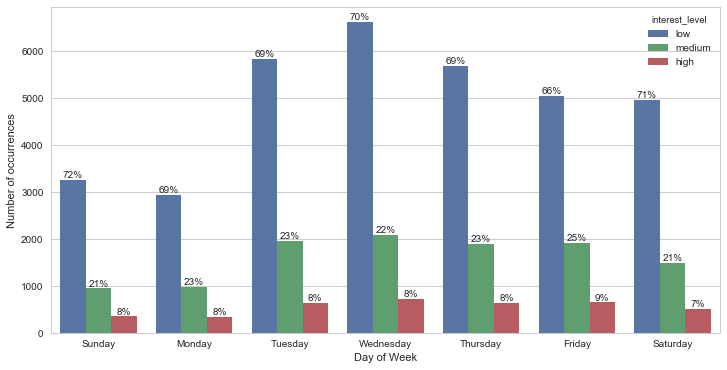

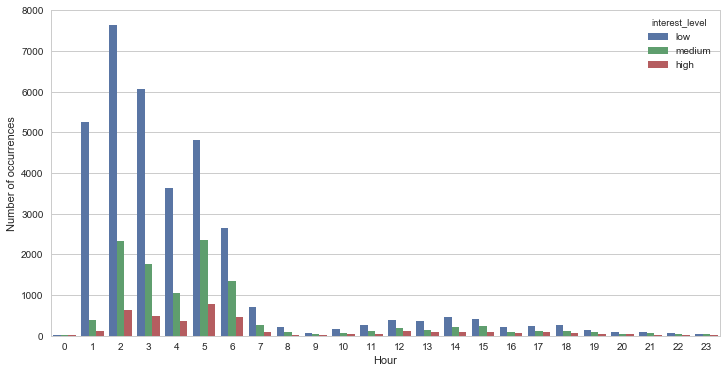

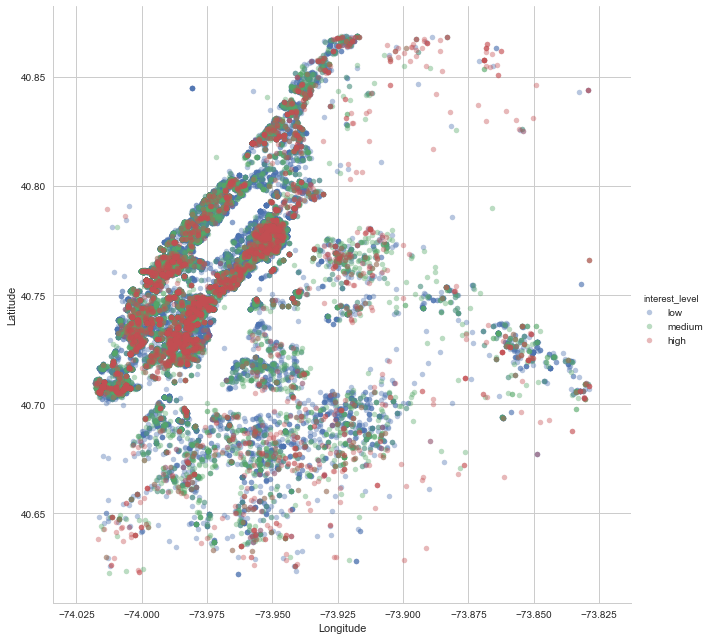

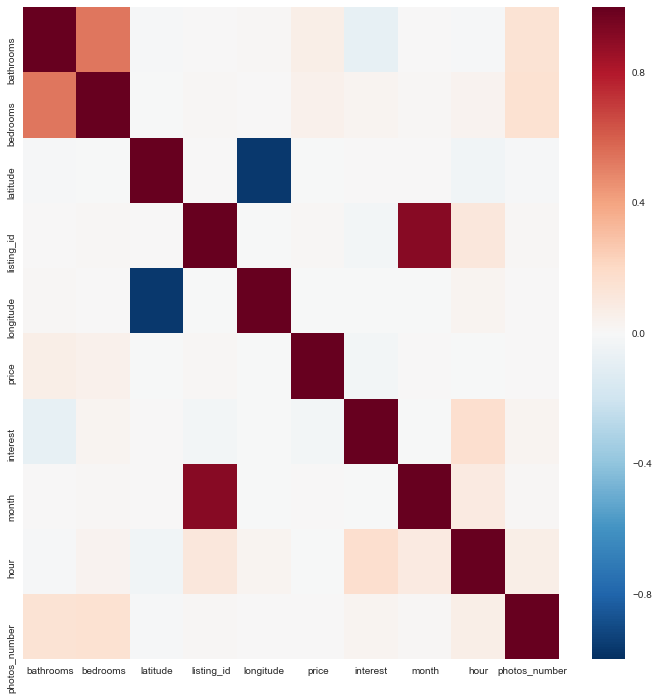

In [4]:

# Graphing average number of Bedrooms vs Interest Level
fig = plt.figure(figsize=(12,12))
sns.barplot(x='interest_level', y='bedrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bedrooms');


# Graphing average number of Bathrooms vs Interest Level
fig = plt.figure(figsize=(12,12))
sns.barplot(x='interest_level', y='bathrooms', data=train_data, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bathrooms');

# Graphing number of photos vs Interest Level
fig = plt.figure(figsize=(12,12))
sns.countplot(x='photos_number', hue='interest_level', hue_order=['low', 'medium', 'high'],
              data=train_data, ax=plt.subplot(212));
plt.xlabel('Number of Photos');
plt.ylabel('Number of occurrences');

# Graphing Iterest Level vs Day of Week
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="day_of_week", hue="interest_level",
                   hue_order=['low', 'medium', 'high'], data=train_data,
                   order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
plt.xlabel('Day of Week');
plt.ylabel('Number of occurrences');

"""Adding percents over bars (Code obtained online - Thank you Quora!!!)"""
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

# Iterest per Day of Week (Code obtained online - Thank you Quora!!!)
fig = plt.figure(figsize=(12,6))
sns.countplot(x="hour", hue="interest_level", hue_order=['low', 'medium', 'high'], data=train_data);
plt.xlabel('Hour');
plt.ylabel('Number of occurrences');

# Graphing interest level by geographic location
sns.lmplot(x="longitude", y="latitude", fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4,'s':30},
           data=train_data[(train_data.longitude>train_data.longitude.quantile(0.005))
                           &(train_data.longitude<train_data.longitude.quantile(0.995))
                           &(train_data.latitude>train_data.latitude.quantile(0.005))                           
                           &(train_data.latitude<train_data.latitude.quantile(0.995))]);
plt.xlabel('Longitude');
plt.ylabel('Latitude');

# Heat map to help determine correlation
fig = plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr())

## 4. Building the Model
Considering that the feature we are trying to predict, interest level, is defined as three categories (low, medium, and high), we should consider using a clasification model.  When building a model, the following six steps should be followed:

1) Define your X and y

2) Choose and import the estimator

3) Instantiate the estimator into a variable

4) Fit your model to your data (X and y)

5) Test the model

6) Calculate the accuracy using the testing set predictions



### 4.1 K-nearest neighbors (KNN) classification

The first model that was tested was K-nearest neighbors (KNN) classification. KNN is a non-parametric (does not include probability density functions) method that is used in statistics for classification and regression.  For classification, KNN the predicted output and in this case the output is interest level.  The output is classified by a majority vote of its "nieghbors" (K), with the output being assigned to the closest K.

**Steps for utilizing KNN**
1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the interest level.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown interest level.

For this model I am concatinating longitude and latitude and using those values to determine the interest level.  The first step is to pick a value for K that provides the least error in predictions.  Based on the calculations provided below, the K that provided the least error was 68.  For the figure below, the training error and testing error are graphed in relation to the K value.  Both error tpyes are defined as:

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

Using this model we were able to calculate the following results:

* Testing Accuaray: **70.2%**

* Null Accuracy: **69.9%**

In [5]:
#STEP 1a: define X and y
X=pd.concat([train_data['latitude'],train_data['longitude']],axis=1)
y=train_data['interest']

# STEP 1b: split X and y into training and testing sets (using random_state for reproducibility)
from sklearn.model_selection import train_test_split
import scipy as sp
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#STEP 2: Choose and import the estimator
from sklearn.neighbors import KNeighborsClassifier

#STEP 3: Instantiate into a variable
# instantiate the estimator with K=68
knn = KNeighborsClassifier(n_neighbors=68)

#STEP 4: Fit model
knn.fit(X_train, y_train)

# STEP 5: test the model on the testing set
y_pred_class = knn.predict(X_test)

#STEP 6: Calculate the accuracy using the testing set predictions
print 'Testing Accuracy =', metrics.accuracy_score(y_test, y_pred_class)
# compute null accuracy
print 'Null Accuracy =' , y_test.value_counts().head(1) / len(y_test)

Testing Accuracy = 0.701977630086
Null Accuracy = 0    0.699384
Name: interest, dtype: float64


In [6]:
# calculate TRAINING Accuracy and TESTING accuracy for K=1 through 100

k_range = range(1, 101)
training_error_rate = []
testing_error_rate = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error_rate.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error_rate.append(1 - testing_accuracy)

(0.29802236991408659, 68)

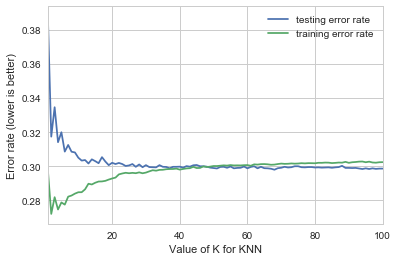

In [7]:
# create a DataFrame of K, training accuracy, and testing acc
column_dict = {'K': k_range, 'training error rate':training_error_rate, 'testing error rate':testing_error_rate}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)

# plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate (lower is better)')

# Display the optimal K value
min(zip(testing_error_rate, k_range))


### 4.2 Logistic Regression
The second model that was tested was logistic regression (log reg). Log reg is a regression model where the output, in this case interest level, is categorical. The output is a binary response (true/false, 1/0, win/loss...) and is modeled with a log function to produce a prediction and the probability the prediction is correct.  The preduction is calculated using the function below:

$$Probability = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$


Unlike KNN, we do not select a K value.  Instead we select predicting features that correlate with your output.  In this case I chose hour of post, rental price, number of photos, and location.

Based on the calculations provided below, I was able to calculate the following results:

* Testing Accuaray: **69.9%**

* Null Accuracy: **69.9%**

In [8]:
#STEP 1a: define X and y
feature_cols = ['hour', 'price', 'photos_number','latitude', 'longitude']
X = train_data[feature_cols]
y = train_data.interest

# STEP 1b: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#STEP 2: Choose and import the estimator
from sklearn.linear_model import LogisticRegression

#STEP 3: Instantiate into a variable
logreg = LogisticRegression(C=1e9)

#STEP 4: Fit model
logreg.fit(X_train, y_train)

# STEP 5: test the model on the testing set
y_pred_class = logreg.predict(X_test)

#STEP 6: Calculate the accuracy using the testing set predictions
# compute testing accuracy
print 'Testing Accuracy =', metrics.accuracy_score(y_test, y_pred_class)
# compute null accuracy
print 'Null Accuracy =' , y_test.value_counts().head(1) / len(y_test)

Testing Accuracy = 0.699465067272
Null Accuracy = 0    0.699384
Name: interest, dtype: float64


## 5. Discussion
When analyzing the effectiveness of a model, we look at the accuracy of the model, but we also want to look at model sensitivity.  One way of analyzing sensitivity is to look at the null accuracy.  The null accuracy is defined as the probability of accurate predictions if the most popular category was set as the default prediction.  In this case the most popular outcome is a low interest level.

For KNN, the testing accuracy was 0.25% greater than the null accuracy.  For log reg, the null accuracy was equal to the null accuaracy.  What this indicates is that you would have almost the same accuarcy stating that a property would recieve low interest as you would using the KNN or log reg models.

A possible reason for this outcome could be due to imbalanced data.  For the dataset, the majority of the listings are low interest levels.  Therefor, when using the data to generate the model, the model going to be more biased towards low interest level properties.


## 6. Conclusion

* **KNN was the best model for predicting interest level**
  * All though KNN was the best model, it was not very effective given the value of the null accuracy.
  

* **Log reg had no difference between model accuracy and the null accuracy**


* **Some methods you can use to increase interest in your listing as a potential landlord**

  * Post in the morning.
      - Posting early makes your listing show up first when people search
      - Sweet Spot: 0200 - 0600
      
  * Post in the middle of the week.
      - Most people search listings during the middle of the work week
      - Sweet Spot: Tuesday - Thursday
  
  * Include photos, but not too much.
      - Sweet Spot: 4 to 6 photos

## 7. Future Steps

### Continue to clean the data and test the new model
**Benefits of path**: Having a more evenly distributed data set with respect to the features could improve the model.

### Use NLP to determine if key words will correlate with interest level

**Benefits of path**: There could potentially be key words utilized that will increase the interest level of a property.

**Costs of path**: Based on past analysis (not listed in report since it was mostly scratch/unclean code) there are approximately 267,906 different words in the dataframe for the features column alone.  Of those 267,906 different words, 1,556 are not repeated (a word unique to single listing).  Sorting through and cleaning this data may be more effort than it is worth.